In [1]:
### 한국은행 통계시스템에서 데이터크롤링하여 전처리하는 프로세스

import requests
import numpy as np
import pandas as pd

## 금리는 class rate: 로 묶기
## CD(91일)
def get_CD_interest_rate(api_key, start_date, end_date):
    
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/' + api_key + '/json/kr/1/100/[STAT_CODE]/D/YYYYMMDD/YYYYMMDD/[SUB_CODE]'
    
    url = url.replace("[STAT_CODE]", "817Y002")
    url = url.replace("YYYYMMDD/YYYYMMDD", start_date + "/" + end_date)
    url = url.replace("[SUB_CODE]", "010502000")

    response = requests.get(url)
    result = response.json()

    list_total_count=(int)(result['StatisticSearch']['list_total_count'])
    list_count=(int)(list_total_count/100) + 1

    rows=[]
    for i in range(0,list_count):
        
        start = str(i * 100 + 1)
        end = str((i + 1) * 100)
        
        url = "http://ecos.bok.or.kr/api/StatisticSearch/" + api_key + "/json/kr/" + start + "/" + end + "/" + "[STAT_CODE]/D/YYYYMMDD/YYYYMMDD/[SUB_CODE]"
    
        url = url.replace("[STAT_CODE]", "817Y002")
        url = url.replace("YYYYMMDD/YYYYMMDD", start_date + "/" + end_date)
        url = url.replace("[SUB_CODE]", "010502000")

        response = requests.get(url)
        data = response.json()
        
        # API로부터 받은 데이터를 파싱하여 기준금리를 추출
        rows += data['StatisticSearch']['row']
    
    CD_rates = pd.DataFrame(rows)

    return CD_rates

## 국고채3년
def get_Korea_interest_rate(api_key, start_date, end_date):
    
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/' + api_key + '/json/kr/1/100/[STAT_CODE]/D/YYYYMMDD/YYYYMMDD/[SUB_CODE]'
    
    url = url.replace("[STAT_CODE]", "817Y002")
    url = url.replace("YYYYMMDD/YYYYMMDD", start_date + "/" + end_date)
    url = url.replace("[SUB_CODE]", "010200000")

    response = requests.get(url)
    result = response.json()

    list_total_count=(int)(result['StatisticSearch']['list_total_count'])
    list_count=(int)(list_total_count/100) + 1

    rows=[]
    for i in range(0,list_count):
        
        start = str(i * 100 + 1)
        end = str((i + 1) * 100)
        
        url = "http://ecos.bok.or.kr/api/StatisticSearch/" + api_key + "/json/kr/" + start + "/" + end + "/" + "[STAT_CODE]/D/YYYYMMDD/YYYYMMDD/[SUB_CODE]"
    
        url = url.replace("[STAT_CODE]", "817Y002")
        url = url.replace("YYYYMMDD/YYYYMMDD", start_date + "/" + end_date)
        url = url.replace("[SUB_CODE]", "010200000")

        response = requests.get(url)
        data = response.json()
        
        rows += data['StatisticSearch']['row']
    
    Korea_rates = pd.DataFrame(rows)

    return Korea_rates

## 회사채3년(AA-)
def get_Company_interest_rate(api_key, start_date, end_date):
    
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/' + api_key + '/json/kr/1/100/[STAT_CODE]/D/YYYYMMDD/YYYYMMDD/[SUB_CODE]'
    
    url = url.replace("[STAT_CODE]", "817Y002")
    url = url.replace("YYYYMMDD/YYYYMMDD", start_date + "/" + end_date)
    url = url.replace("[SUB_CODE]", "010300000")

    response = requests.get(url)
    result = response.json()

    list_total_count=(int)(result['StatisticSearch']['list_total_count'])
    list_count=(int)(list_total_count/100) + 1

    rows=[]
    for i in range(0,list_count):
        
        start = str(i * 100 + 1)
        end = str((i + 1) * 100)
        
        url = "http://ecos.bok.or.kr/api/StatisticSearch/" + api_key + "/json/kr/" + start + "/" + end + "/" + "[STAT_CODE]/D/YYYYMMDD/YYYYMMDD/[SUB_CODE]"
    
        url = url.replace("[STAT_CODE]", "817Y002")
        url = url.replace("YYYYMMDD/YYYYMMDD", start_date + "/" + end_date)
        url = url.replace("[SUB_CODE]", "010300000")

        response = requests.get(url)
        data = response.json()
        
        rows += data['StatisticSearch']['row']
    
    Company_rates = pd.DataFrame(rows)

    return Company_rates


### 보안유의!!
api_key = 'key'

# 금리
rate_start_date = input("조회할 금리의 시작날짜입력(YYYYMMDD):")
rate_end_date = input("조회할 금리의 마지막날짜입력(YYYYMMDD):")
CD_rates = get_CD_interest_rate(api_key, rate_start_date, rate_end_date)
Korea_rates = get_Korea_interest_rate(api_key, rate_start_date, rate_end_date)
Company_rates = get_Company_interest_rate(api_key, rate_start_date, rate_end_date)

# Company_rates = {item['TIME']: item['DATA_VALUE'] for item in data['StatisticSearch']['row']}

# 위 방식으로 함수를 만들어 크롤링하면 됨!
# 환율 -- 달러, 엔화, 위안화, 유로화
# 주가지수 -- 코스피, 코스닥, 다우존스, 나스닥, 닛케이, 홍콩항셍
# 원자재 -- 원유(WTI), 금, ...



In [3]:
### 거시경제지표를 대시보드형태로 만드는 프로세스

import plotly.graph_objects as go
import pandas as pd

## 금리
labels = [CD_rates.iloc[0,3], Korea_rates.iloc[0,3], Company_rates.iloc[0,3]]
values = [float(CD_rates.iloc[-1,-1]), float(Korea_rates.iloc[-1,-1]), float(Company_rates.iloc[-1,-1])]

# 조회한 마지막날짜를 출력하도록 설계 --> datetime.today로 오늘날짜를 출력하도록 할수도 있음
dates = [rate_end_date[0:4] + '-' + rate_end_date[4:6] + '-' + rate_end_date[6:]] * 3
changes = [(float(CD_rates.iloc[-1,-1]) - float(CD_rates.iloc[-2,-1]))/float(CD_rates.iloc[-2,-1]),
            (float(Korea_rates.iloc[-1,-1]) - float(Korea_rates.iloc[-2,-1]))/float(Korea_rates.iloc[-2,-1]),
            (float(Company_rates.iloc[-1,-1]) - float(Company_rates.iloc[-2,-1]))/float(Company_rates.iloc[-2,-1])]

# 플롯 생성
fig = go.Figure()

# 각 지표를 별도의 텍스트 박스로 추가
for i, (label, value, date, change) in enumerate(zip(labels, values, dates, changes)):
    fig.add_trace(go.Indicator(
        mode="number+delta",
        value=value,
        number={'suffix': " "},
        delta={'reference': value, 'relative': True, 'valueformat': '.2%'},
        title={'text': f"{label}<br><span style='font-size:0.8em;color:gray'>{date} / 변동: {change}</span>"},
        domain={'row': i // 2, 'column': i % 2}
    ))

# 그리드 레이아웃 설정
fig.update_layout(
    grid={'rows': 2, 'columns': 2, 'pattern': "independent"},
    height=600,
    margin=dict(l=20, r=20, t=30, b=30)
)

fig.show()

## 환율
## 주가지수
## 원자재



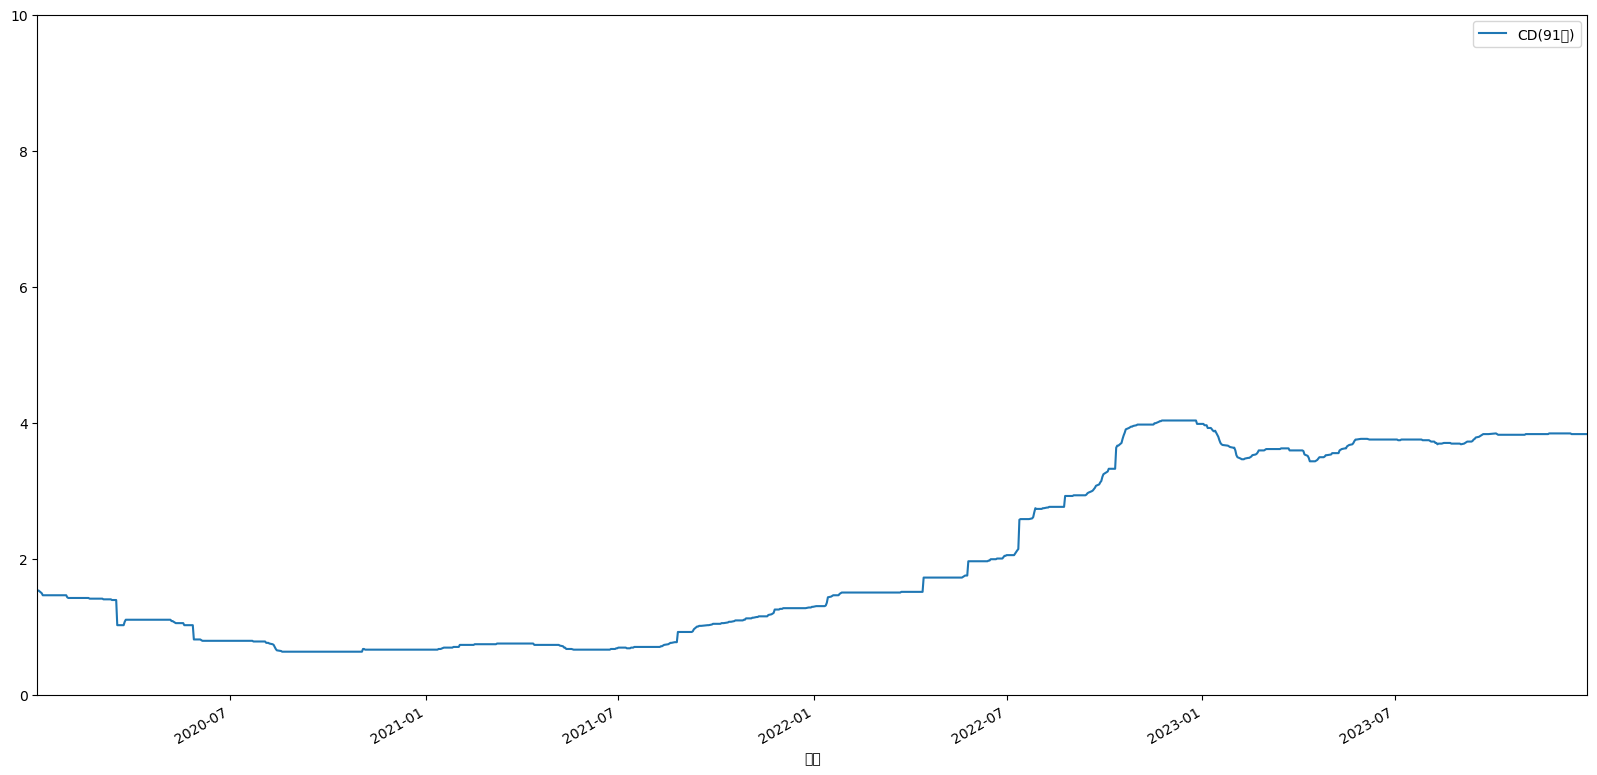

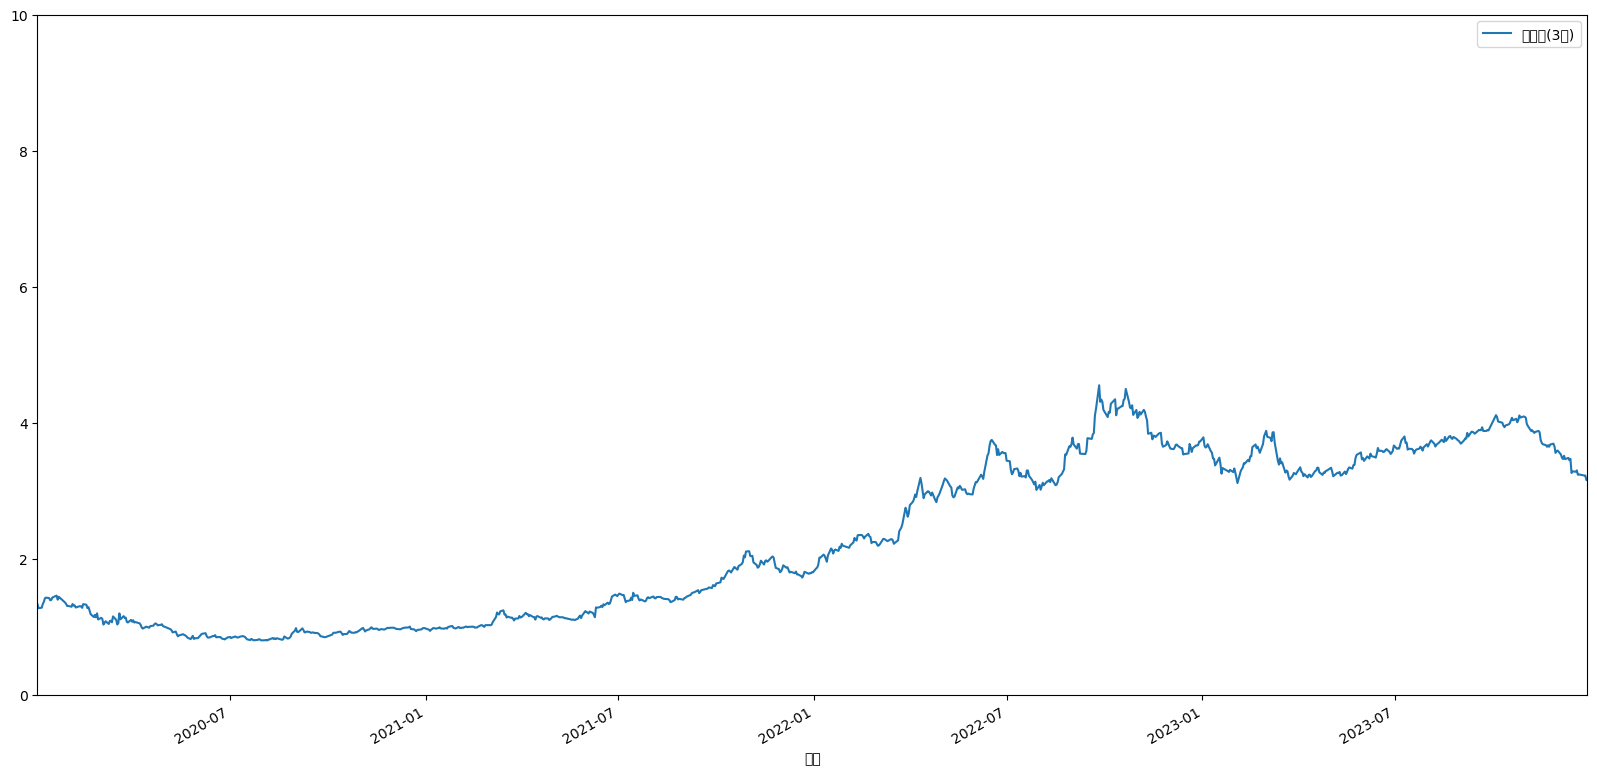

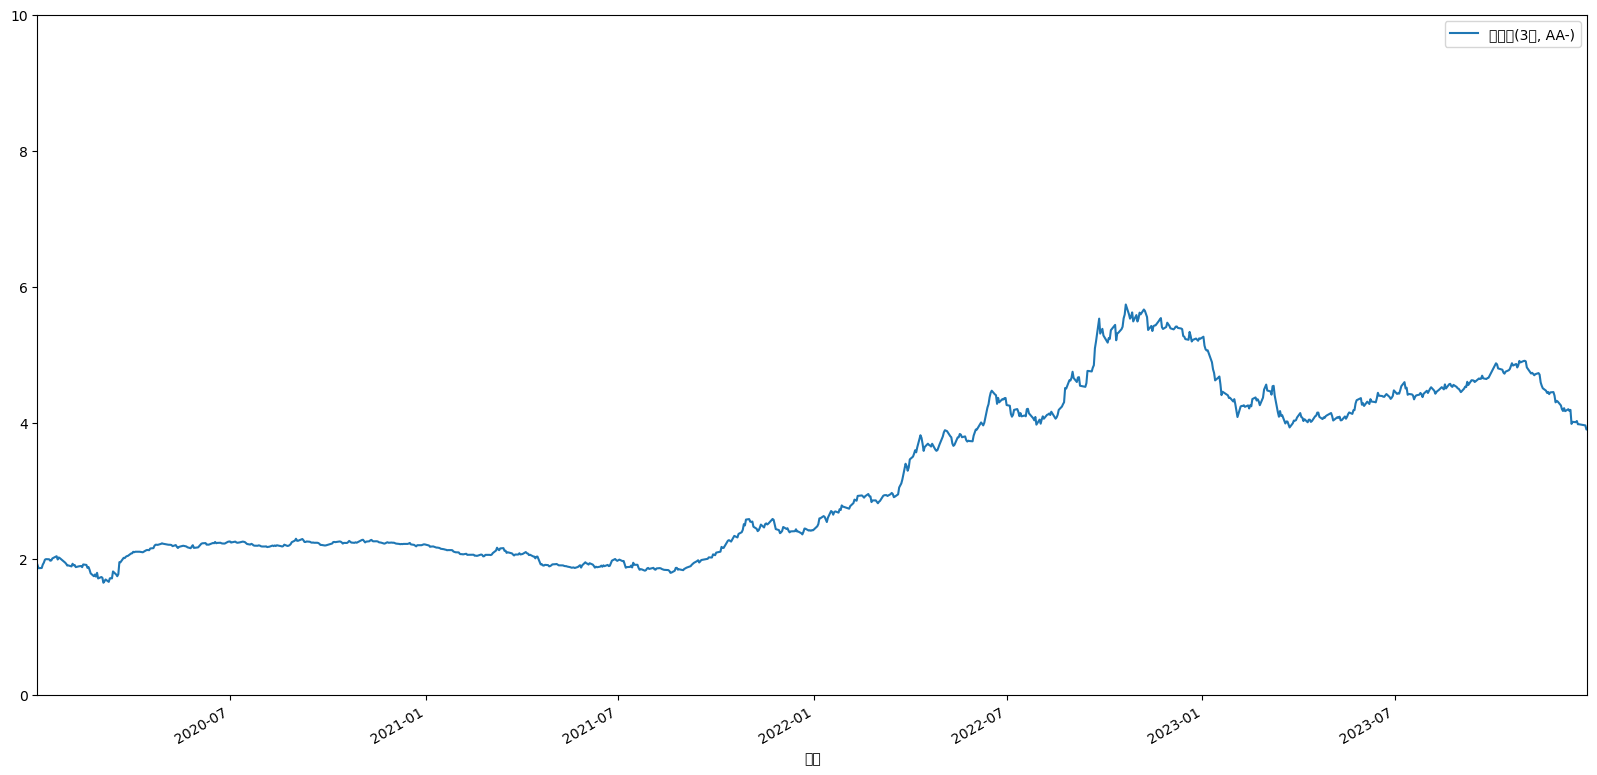

In [4]:
### 해당 경제지표 DataFrame의 라인차트를 출력해주는 함수

import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

def print_linechart(df):

    df_ = df.iloc[:,-2:]
    df_.columns = ['기간', df.iloc[0,3]]  # 연도와 수치 dataframe화
    df_.set_index('기간', inplace=True) # 1열 TIME을 index화
    df_.index = pd.to_datetime(df_.index, format='%Y%m%d')
    df_[df.iloc[0,3]] = df_[df.iloc[0,3]].astype(float)
    

    df_.plot(xlim=[df_.index[0], df_.index[-1]], ylim=(0,10), figsize=(20,10))
    plt.show()

    return 

print_linechart(CD_rates)
print_linechart(Korea_rates)
print_linechart(Company_rates)

In [5]:
### KOSPI 100개기업 시총순위별로 사각형크기 나누고 주가와 당일 등락률표시

import FinanceDataReader as fdr
import pandas as pd
import numpy as np

# 크롤링
kospi100 = fdr.StockListing('KOSPI')

# 시가총액으로 정렬하고 상위 100개 선택
kospi100 = kospi100.sort_values(by='Marcap', ascending=False).head(100)

# 섹터 열 추가, 업종명만 엑셀파일 참고라 코스피에 대규모상장만 안하면 교체필요 없음
sector_df = pd.read_excel("/Users/hw/서강대학부자료/Quantifi/Trading AI/Crawling-and-Visualization-of-Macroeconomic-Indicators/20240514_업종분류표.xlsx")

sector_df.rename(columns={'종목코드':'Code'}, inplace=True)
kospi100_df = pd.merge(kospi100, sector_df, on='Code')
kospi100_df = pd.concat([kospi100_df.iloc[:,1:17], kospi100_df.iloc[:,19:20]],axis=1)
kospi100_df.rename(columns={'업종명':'Sector'}, inplace=True)

# 시가총액을 숫자형으로 변환
kospi100_df['Marcap'] = kospi100_df['Marcap'].astype(float)

# 함수 정의: 음수는 그대로, 양수는 +와 % 추가
kospi100_df['ChagesRatio'] = np.where(kospi100_df['ChagesRatio']<0,
                                kospi100_df['ChagesRatio'].astype(str) + "%",
                                "+" + kospi100_df['ChagesRatio'].astype(str) + "%")

# 섹터별로 데이터를 그룹화
grouped = kospi100_df.groupby('Sector').sum()

## 시총순 섹터별 사각형크기로 시각화
import plotly.express as px

fig = px.treemap(kospi100_df, path=['Sector', 'Name', 'ChagesRatio'], values='Marcap',
                 color='Sector', hover_data=['Marcap'],
                 color_continuous_scale='Viridis', title="코스피 시장 주식 시각화")
fig.show()
